In [1]:
from classes.basic_optical_gating import BasicOpticalGating as BOG
from classes.basic_optical_gating import AdaptedV as BOGV
import matplotlib.pyplot as plt
import numpy as np
import tifffile as tf

In [2]:
from classes.drawer import Peristalsis

v = Peristalsis(3, 39.1, (256, 256))
v.generate_reference_sequence()
v.generate_sequence()

tf.imwrite("seq.tif", v.sequence)

sog = BOG()
sog.logger.set_quiet()
sog.set_reference_period(v.reference_period)
sog.set_reference_sequence(v.reference_sequence)
sog.set_sequence(v.sequence)
sog.run()

sogv = BOGV()
sogv.logger.set_quiet()
sogv.set_reference_period(v.reference_period)
sogv.set_reference_sequence(v.reference_sequence)
sogv.set_sequence(v.sequence)
sogv.run()

In [3]:
frame = 100

minima = np.argmin(sog.sads[frame][2:-2]) + 2

seq = []
for f in range(sog.reference_sequence.shape[0]):
    seq.append(np.abs(sog.sequence[frame].astype(np.int32) - sog.reference_sequence[f].astype(np.int32)))

seq = np.array(seq)
tf.imwrite("test.tif", seq)

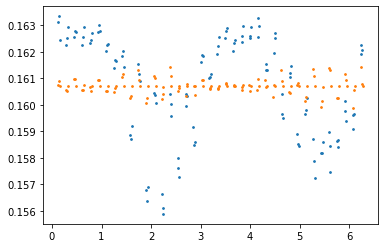

In [4]:
plt.scatter(sog.phases[1::], sog.delta_phases, s = 3)
plt.scatter(sogv.phases[1::], sogv.delta_phases, s = 3)
plt.show()

In [8]:
sequence = "D:/Data/Edinburgh_data_May_2023/seq.tif"
reference_sequence = "D:/Data/Edinburgh_data_May_2023/ref_seq.tif"
reference_sequence_period = "D:/Data/Edinburgh_data_May_2023/ref_seq.txt"

plt.figure(figsize = (16,10))

og = BOG()
og.set_sequence(sequence)
og.set_reference_sequence(reference_sequence)
og.set_reference_period(reference_sequence_period)
og.run(clear_memory=True)

<Figure size 1152x720 with 0 Axes>

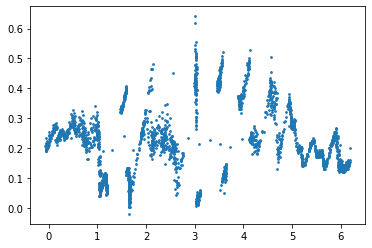

In [6]:
plt.scatter(og.phases[1::], og.delta_phases, s = 3)
plt.show()

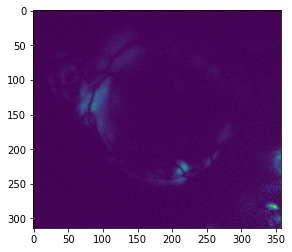

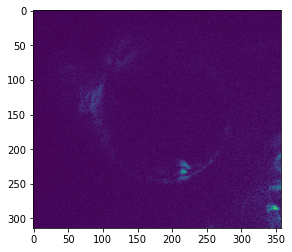

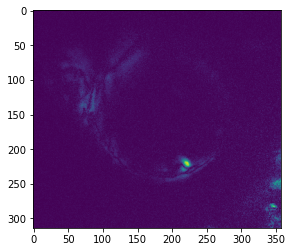

In [58]:
frame = 8

minima = np.argmin(og.sads[frame][2:-2]) + 2

seq = []
for f in range(og.reference_sequence.shape[0]):
    diff = og.reference_sequence[frame].astype(np.int32) - og.reference_sequence[f].astype(np.int32)
    seq.append(np.abs(diff))

seq_diffs = np.array(seq)
tf.imwrite("ref_diffs.tif", seq_diffs)

plt.imshow(np.abs(og.sequence[frame] - og.reference_sequence[minima - 1].astype(np.int32)))
plt.show()

plt.imshow(np.abs(og.sequence[frame] - og.reference_sequence[minima].astype(np.int32)))
plt.show()

plt.imshow(np.abs(og.sequence[frame] - og.reference_sequence[minima + 1].astype(np.int32)))
plt.show()

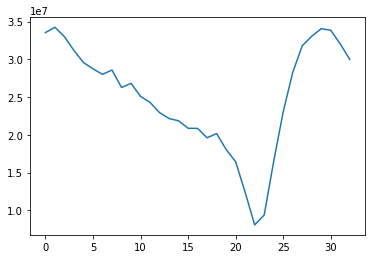

In [59]:
plt.plot(og.sads[8])

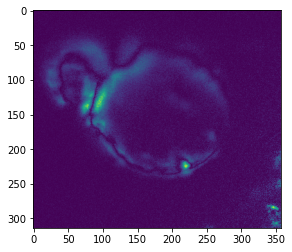

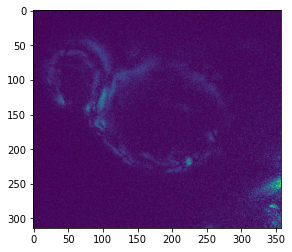

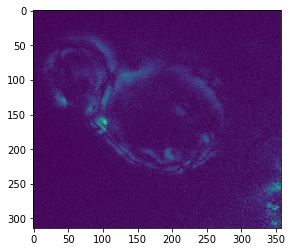

In [21]:
minima = np.argmin(og.sads[frame][2:-2]) + 2

seq = []
for f in range(1, og.reference_sequence.shape[0]):
    diff = og.reference_sequence[f].astype(np.int32) - og.reference_sequence[f - 1].astype(np.int32)
    seq.append(np.abs(diff))

seq_prev_diffs = np.array(seq)
tf.imwrite("ref_prev.tif", seq_prev_diffs)

plt.imshow(np.abs(og.sequence[frame] - og.reference_sequence[minima - 1].astype(np.int32)))
plt.show()

plt.imshow(np.abs(og.sequence[frame] - og.reference_sequence[minima].astype(np.int32)))
plt.show()

plt.imshow(np.abs(og.sequence[frame] - og.reference_sequence[minima + 1].astype(np.int32)))
plt.show()

In [57]:
tosave = []
for t in range(seq_prev_diffs.shape[0]):
    tosave.append([seq_diffs[t], seq_prev_diffs[t], np.zeros_like(seq_prev_diffs[t])])

tosave = np.array(tosave)

tf.imwrite("combined.tif", np.array(tosave))

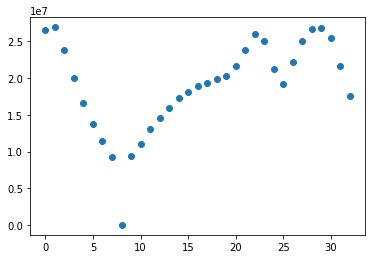

In [66]:
frame = 8
seq = []
for f in range(og.reference_sequence.shape[0]):
    diff = og.reference_sequence[frame].astype(np.int32) - og.reference_sequence[f].astype(np.int32)
    seq.append(np.sum(np.abs(diff)))

plt.scatter(range(len(seq)), seq)
plt.show()

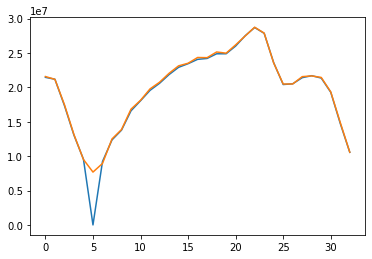

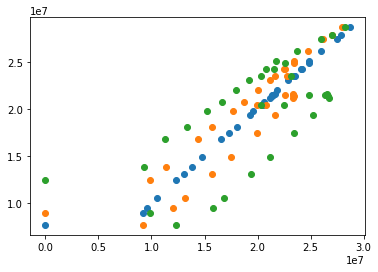

In [92]:
plt.plot(og.sads[19])
plt.plot(og.sads[76])
plt.show()

plt.scatter(og.sads[19], og.sads[76])
plt.scatter(og.sads[20], og.sads[76])
plt.scatter(og.sads[21], og.sads[76])
plt.show()